In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df_forecast = pd.read_csv('data/forecastdemand_nsw.csv', names = ['id', 'region_id', 'period_id', 'forecast_demand', 'date_time_curent', 'date_time_future'], skiprows = 1)
df_forecast.date_time_future = pd.to_datetime(df_forecast.date_time_future, format = "%Y-%m-%d %H:%M:%S")
df_forecast.date_time_curent = pd.to_datetime(df_forecast.date_time_curent, format = "%Y-%m-%d %H:%M:%S")

df_forecast["forecast_interval"] = df_forecast.date_time_future - df_forecast.date_time_curent
df_forecast.forecast_interval_hrs = df_forecast.forecast_interval.apply(lambda x: x.total_seconds()/(60*60))

C:\Users\Chamath\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [3]:
# Exploration - Forecast Dataset
print("Regions = {}".format(set(df_forecast.region_id)))
#print("Periods = {}".format(set(df_forecast.period_id)))
print("Forecast Date Min = {}  |  Forecast Date Max = {}".format(df_forecast.date_time_future.min(), df_forecast.date_time_future.max()))
print("Predict Date Min = {}  |  Predict Date Max = {}".format(df_forecast.date_time_curent.min(), df_forecast.date_time_curent.max()))
print("Forecast Demand Min = {}  |  Forecast Demand Max = {}\n".format(df_forecast.forecast_demand.min(), df_forecast.forecast_demand.max()))
print(df_forecast.head())
print("\nRows = {}".format(len(df_forecast)))

Regions = {'NSW1'}
Forecast Date Min = 2010-01-01 00:00:00  |  Forecast Date Max = 2021-03-18 00:00:00
Predict Date Min = 2009-12-30 12:31:49  |  Predict Date Max = 2021-03-17 23:31:33
Forecast Demand Min = 4422.46  |  Forecast Demand Max = 14736.66

           id region_id  period_id  forecast_demand    date_time_curent  \
0  2009123018      NSW1         71          7832.04 2009-12-30 12:31:49   
1  2009123019      NSW1         70          7832.04 2009-12-30 13:01:43   
2  2009123020      NSW1         69          7832.03 2009-12-30 13:31:36   
3  2009123021      NSW1         68          7832.03 2009-12-30 14:01:44   
4  2009123022      NSW1         67          7830.96 2009-12-30 14:31:35   

  date_time_future  
0       2010-01-01  
1       2010-01-01  
2       2010-01-01  
3       2010-01-01  
4       2010-01-01  

Rows = 10906019


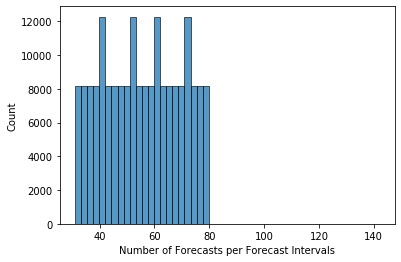

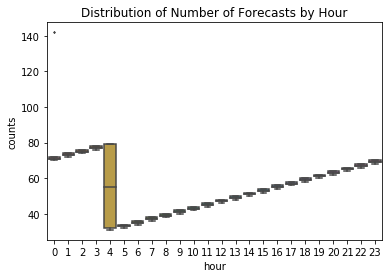

In [167]:
forecasts_per_interval = df_forecast.groupby("date_time_future", as_index = False).count().rename({"id" : "counts"}, axis = 1)[["counts", "date_time_future"]]
sns.histplot(forecasts_per_interval.counts, bins = 50);
plt.xlabel("Number of Forecasts per Forecast Intervals")

plt.figure()
forecasts_per_interval["hour"] = forecasts_per_interval.date_time_future.dt.hour
sns.boxplot(data = forecasts_per_interval, x = "hour", y = "counts", fliersize = 1)
#E.g. gives the distribution of counts made for future times at a particular hour of the day. Median count for a 3am forecast (future) is ~80, with some future times getting 140 predictions.
plt.title("Distribution of Number of Forecasts by Hour");

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

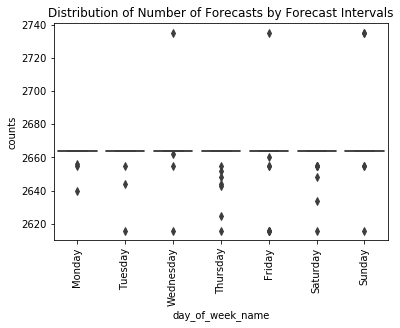

In [161]:
df_forecast_count_per_date = df_forecast.loc[df_forecast.date_time_future.dt.year < 2021].copy()
df_forecast_count_per_date["date"] = df_forecast.date_time_future.dt.normalize()
df_forecast_count_per_date = df_forecast_count_per_date.groupby("date", as_index = False).count().rename({"id" : "counts"}, axis = 1)[["date", "counts"]]
df_forecast_count_per_date["day_of_week"] = df_forecast_count_per_date.date.dt.dayofweek
df_forecast_count_per_date["day_of_week_name"] = df_forecast_count_per_date.date.dt.day_name()

plt.figure()
sns.boxplot(data = df_forecast_count_per_date.sort_values("day_of_week"), x = "day_of_week_name", y = "counts")
#E.g. gives the distribution of counts made for future times on Friday. Median count for a Friday forecast (future) times is ~55, with some future times getting 140 predictions.
plt.title("Distribution of Number of Forecasts by Forecast Intervals");
plt.xticks(rotation = 90)

In [ ]:
df_forecast_count_per_date = df_forecast.loc[df_forecast.date_time_future.dt.year < 2021].copy()
df_forecast_count_per_date["date"] = df_forecast.date_time_future.dt.normalize()
df_forecast_count_per_date = df_forecast_count_per_date.groupby(["date", as_index = False).count().rename({"id" : "counts"}, axis = 1)[["date", "counts"]]
df_forecast_count_per_date["day_of_week"] = df_forecast_count_per_date.date.dt.dayofweek
df_forecast_count_per_date["day_of_week_name"] = df_forecast_count_per_date.date.dt.day_name()

plt.figure()
sns.boxplot(data = df_forecast_count_per_date.sort_values("day_of_week"), x = "day_of_week_name", y = "counts")
#E.g. gives the distribution of counts made for future times on Friday. Median count for a Friday forecast (future) times is ~55, with some future times getting 140 predictions.
plt.title("Distribution of Number of Forecasts by Forecast Intervals");
plt.xticks(rotation = 90)